# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp-273.15,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | hanzhong
Processing Record 5 of Set 1 | qarah bagh
Processing Record 6 of Set 1 | knyaginino
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | khandyga
Processing Record 9 of Set 1 | juegang
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | callao
Processing Record 19 of Set 1 | kingston
Processing Record 20 of Set 1 | petropavlovsk-kamchatsky
Processing Record 21 of Set 1 | nemuro
Proc

Processing Record 39 of Set 4 | katsuura
Processing Record 40 of Set 4 | hawaiian paradise park
Processing Record 41 of Set 4 | luanda
Processing Record 42 of Set 4 | benguela
Processing Record 43 of Set 4 | stephenville
Processing Record 44 of Set 4 | colchani
Processing Record 45 of Set 4 | alice springs
Processing Record 46 of Set 4 | olonkinbyen
Processing Record 47 of Set 4 | lihue
Processing Record 48 of Set 4 | utrik
Processing Record 49 of Set 4 | prince rupert
Processing Record 0 of Set 5 | auki
Processing Record 1 of Set 5 | rudsar
Processing Record 2 of Set 5 | la'ie
Processing Record 3 of Set 5 | mo i rana
Processing Record 4 of Set 5 | pahrump
Processing Record 5 of Set 5 | happy valley-goose bay
Processing Record 6 of Set 5 | sao gabriel da cachoeira
Processing Record 7 of Set 5 | yaren
Processing Record 8 of Set 5 | vorgashor
Processing Record 9 of Set 5 | asau
Processing Record 10 of Set 5 | puerto aysen
Processing Record 11 of Set 5 | bafoulabe
Processing Record 12 of 

Processing Record 31 of Set 8 | santa marta de ortigueira
Processing Record 32 of Set 8 | sungai penuh
Processing Record 33 of Set 8 | nadym
Processing Record 34 of Set 8 | lautoka
Processing Record 35 of Set 8 | jayapura
Processing Record 36 of Set 8 | appley bridge
Processing Record 37 of Set 8 | burutu
Processing Record 38 of Set 8 | acapulco de juarez
Processing Record 39 of Set 8 | laurel
Processing Record 40 of Set 8 | bayanhongor
Processing Record 41 of Set 8 | portland
Processing Record 42 of Set 8 | ilheus
Processing Record 43 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 44 of Set 8 | majene
Processing Record 45 of Set 8 | flin flon
Processing Record 46 of Set 8 | road town
Processing Record 47 of Set 8 | escanaba
Processing Record 48 of Set 8 | coruripe
Processing Record 49 of Set 8 | horta
Processing Record 0 of Set 9 | al jubayl
Processing Record 1 of Set 9 | graaff-reinet
Processing Record 2 of Set 9 | sinhyeon
Processing Record 3 of Set 9 | santana 

Processing Record 19 of Set 12 | burlington
Processing Record 20 of Set 12 | mangai
Processing Record 21 of Set 12 | suances
Processing Record 22 of Set 12 | miyaly
Processing Record 23 of Set 12 | itoman
Processing Record 24 of Set 12 | meskiana
Processing Record 25 of Set 12 | gandajika
Processing Record 26 of Set 12 | isna
Processing Record 27 of Set 12 | sakaiminato
Processing Record 28 of Set 12 | hadibu
Processing Record 29 of Set 12 | dzuunmod
Processing Record 30 of Set 12 | san buenaventura
Processing Record 31 of Set 12 | inirida
Processing Record 32 of Set 12 | burang
Processing Record 33 of Set 12 | dasnapur
-----------------------------
Data Retrieval Complete      
-----------------------------


In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,15.66,90,43,15.02,SH,1699377422
1,bredasdorp,-34.5322,20.0403,15.46,57,53,4.80,ZA,1699377422
2,adamstown,-25.0660,-130.1015,22.59,85,100,9.75,PN,1699377422
3,hanzhong,33.0728,107.0303,12.67,82,75,0.67,CN,1699377423
4,qarah bagh,34.9402,61.7759,16.62,55,100,3.70,AF,1699377423


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.66,90,43,15.02,SH,1699377422
1,bredasdorp,-34.5322,20.0403,15.46,57,53,4.80,ZA,1699377422
2,adamstown,-25.0660,-130.1015,22.59,85,100,9.75,PN,1699377422
3,hanzhong,33.0728,107.0303,12.67,82,75,0.67,CN,1699377423
4,qarah bagh,34.9402,61.7759,16.62,55,100,3.70,AF,1699377423


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

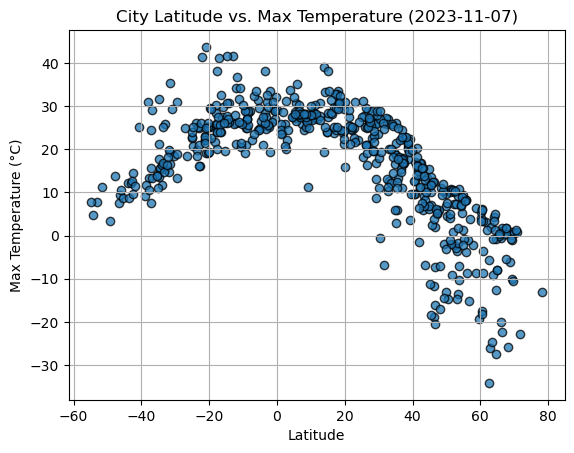

In [35]:
# Build scatter plot for latitude vs. temperature
from datetime import datetime
date_unix = city_data_df["Date"].iloc[0]
date = datetime.utcfromtimestamp(date_unix).strftime('%Y-%m-%d')

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")  # You can change the unit based on your data
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

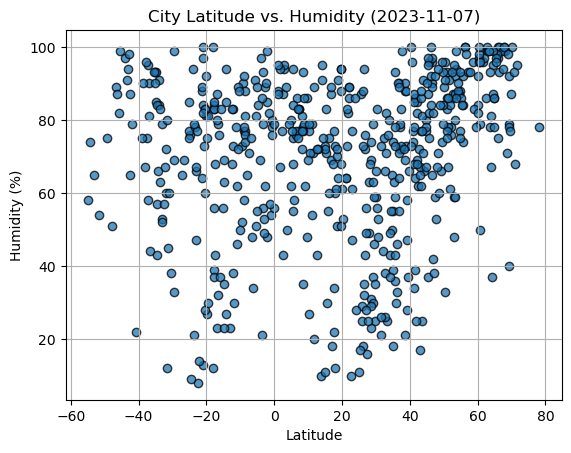

In [36]:
# Build the scatter plots for latitude vs. humidity
from datetime import datetime
date_unix = city_data_df["Date"].iloc[0]
date = datetime.utcfromtimestamp(date_unix).strftime('%Y-%m-%d')

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

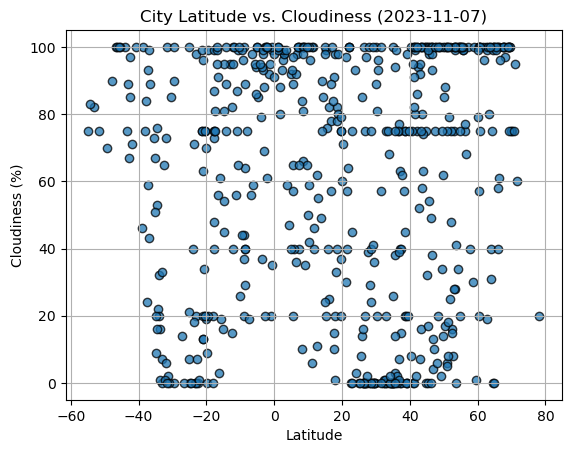

In [37]:
# Build the scatter plots for latitude vs. cloudiness
from datetime import datetime
date_unix = city_data_df["Date"].iloc[0]
date = datetime.utcfromtimestamp(date_unix).strftime('%Y-%m-%d')

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

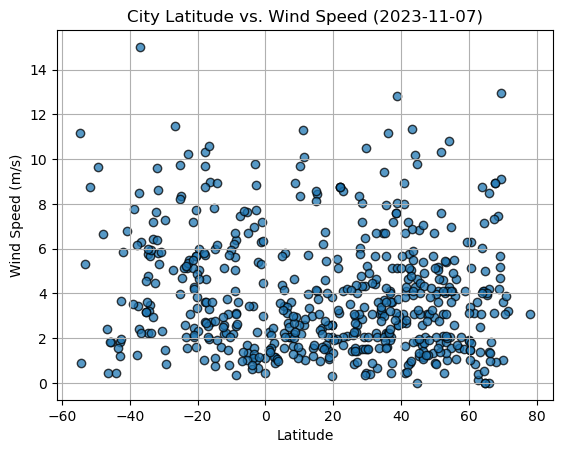

In [38]:
# Build the scatter plots for latitude vs. wind speed
from datetime import datetime
date_unix = city_data_df["Date"].iloc[0]
date = datetime.utcfromtimestamp(date_unix).strftime('%Y-%m-%d')

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")  # You can change the unit based on your data
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE